In [ ]:
import numpy as np
import pandas as pd
from keras import utils # utils.to_categorical 원핫인코딩
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [6]:
df = pd.read_csv('data/pima-indians-diabetes.csv', header=None, comment='#')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.iloc[:,-1] # 당뇨 여부
df.iloc[:,-1].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [7]:
# csv 파일을 numpy 로 읽어오기 : np.loadtxt(결측치없을 경우), np.genfromtxt(결측치있을 경우)
dataset = np.loadtxt('data/pima-indians-diabetes.csv', encoding='utf-8', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# 데이터 분할 : 학습데이터셋(모델학습용)+시험데이터셋(모델평가용)
X_train = dataset[:700, :-1]
y_train = dataset[:700,-1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [3]:
model = Sequential()
model.add(Input(shape=(8,))) # 입력층
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # 이진 분류에서의 출력층 활성화 함수 sigmode, 3개 이상이면 softmax (출력합이 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습 

In [9]:
hist = model.fit(X_train, y_train, epochs=200, batch_size=350, validation_split=0.1, verbose=2)

Epoch 1/200
2/2 - 1s - loss: 4.8812 - binary_accuracy: 0.6524 - val_loss: 4.2793 - val_binary_accuracy: 0.6286 - 793ms/epoch - 396ms/step
Epoch 2/200
2/2 - 0s - loss: 3.5720 - binary_accuracy: 0.6540 - val_loss: 3.1851 - val_binary_accuracy: 0.6286 - 34ms/epoch - 17ms/step
Epoch 3/200
2/2 - 0s - loss: 2.6844 - binary_accuracy: 0.6524 - val_loss: 2.4643 - val_binary_accuracy: 0.6143 - 33ms/epoch - 16ms/step
Epoch 4/200
2/2 - 0s - loss: 2.3089 - binary_accuracy: 0.6492 - val_loss: 2.3074 - val_binary_accuracy: 0.5857 - 34ms/epoch - 17ms/step
Epoch 5/200
2/2 - 0s - loss: 2.2753 - binary_accuracy: 0.6381 - val_loss: 2.3704 - val_binary_accuracy: 0.5286 - 34ms/epoch - 17ms/step
Epoch 6/200
2/2 - 0s - loss: 2.2748 - binary_accuracy: 0.6286 - val_loss: 2.2966 - val_binary_accuracy: 0.5143 - 34ms/epoch - 17ms/step
Epoch 7/200
2/2 - 0s - loss: 2.1388 - binary_accuracy: 0.6365 - val_loss: 2.0391 - val_binary_accuracy: 0.5571 - 38ms/epoch - 19ms/step
Epoch 8/200
2/2 - 0s - loss: 1.9061 - binary_a

## 5. 모델 평가하기(학습과정보기, 평가, 혼동행렬)

In [11]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

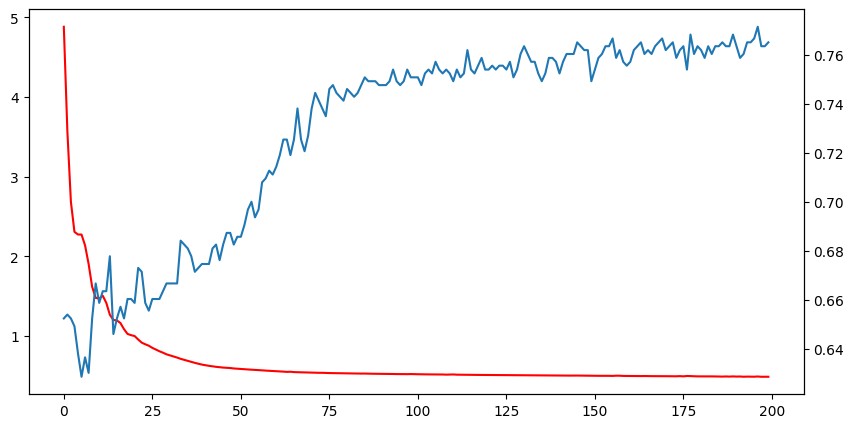

In [18]:
# 학습과정 표시(학습데이터에 대한 loss와 accuracy)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history.get('binary_accuracy'))

In [19]:
# 모델 평가
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.7103 - binary_accuracy: 0.6618


[0.7102652788162231, 0.6617646813392639]

## 혼동행렬
- 테스트 데이터 셋의 실제값과 예측값으로 작성된 교차표

In [44]:
# 실제값: y_test (68)
# 예측값
y_hat = (model.predict(X_test)>= 0.5).astype(float)

3/3 [==============================] - 0s 3ms/step


In [47]:
y_hat = (model.predict(X_test)>= 0.5).astype(float)
TN = 0 # 0을 0으로 예측한 경우의 수 (T)
FP = 0 # 0을 1로   예측한 경우의 수 (F)
FN = 0 # 1을 0으로 예측한 경우의 수 (F)
TP = 0 # 1을 1로   예측한 경우의 수 (T)

for y,h in zip(y_test, y_hat.reshape(-1)):
    if y==0 and h==0: TN+=1
    elif y==0 and h==1: FP+=1
    elif y==1 and h==0: FN+=1
    else: TP+=1
print(TN, FP)
print(FN, TP)

3/3 [==============================] - 0s 3ms/step
36 5
18 9


In [34]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,36,5
1.0,18,9


In [36]:
pd.crosstab(y_test, y_hat.reshape(-1), rownames=['실제값'], colnames=['예측값'])

예측값,0.0,1.0
실제값,,
0.0,36,5
1.0,18,9


In [37]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat.reshape(-1))

array([[36,  5],
       [18,  9]], dtype=int64)

In [50]:
# accuracy
print('accracy :',(TN+TP)/(TN+FP+FN+TP))
print('recall :',TP/(TP+FN))
print('precision :', TP/(TP+FP))

accracy : 0.6617647058823529
recall : 0.3333333333333333
precision : 0.6428571428571429


## 6. 모델사용

In [68]:
int(model.predict(np.array([X_test[0]]))>=0.5)

1/1 [==============================] - 0s 31ms/step


0

# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋(600), 검증셋(100), 테스트셋(68)
2. 모델 생성(input8, output 2) : 출력층 softmax(출력합을 1)
    * model.summary() 파라미터수와 메모리 확인
3. 모델 학습과정 설정 : loss='categorical_crossentropy, metrics=['accuray']
4. 모델 학습 : 훈련셋과 검증셋
5. 모델 평가 : 그래프(hist.history), 평가(테스트셋), 교차표(테스트셋)
6. 모델 저장 및 사용 : predict결과에 argmax()

## 1. 데이터 셋 생성 및 전처리

In [ ]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', encoding='utf-8', delimiter=',')
dataset.shape

(768, 9)

In [86]:
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]

In [90]:
# 종속변수의 원핫인코딩(분류분석)
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)

Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (68, 2))

## 2. 모델 생성(input8, targe2)
- 과적합 줄이는 단계 추가

In [111]:
from keras.layers import Dropout
model = Sequential()
model.add(Input(shape=(8,))) # 입력층
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1)) # 과적합을 주이는 단계. 파라미터를 완벽하지 않게 전달
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=2, activation='softmax')) # 이진 분류에서의 출력층 활성화 함수 sigmode, 3개 이상이면 softmax (출력합이 1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                288       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 16)                1040      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                

## 3. 학습과정 설정

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습

In [113]:
hist = model.fit(X_train, Y_train, epochs=300, validation_data=(X_val, Y_val), verbose=1, batch_size=300)

Epoch 1/300
2/2 [==============================] - 1s 194ms/step - loss: 28.2495 - accuracy: 0.4300 - val_loss: 20.1872 - val_accuracy: 0.3300
Epoch 2/300
2/2 [==============================] - 0s 32ms/step - loss: 22.4319 - accuracy: 0.4400 - val_loss: 10.6436 - val_accuracy: 0.3700
Epoch 3/300
2/2 [==============================] - 0s 31ms/step - loss: 15.0126 - accuracy: 0.4900 - val_loss: 5.6599 - val_accuracy: 0.5100
Epoch 4/300
2/2 [==============================] - 0s 31ms/step - loss: 13.3519 - accuracy: 0.5083 - val_loss: 4.5398 - val_accuracy: 0.6400
Epoch 5/300
2/2 [==============================] - 0s 32ms/step - loss: 11.3084 - accuracy: 0.5933 - val_loss: 6.1939 - val_accuracy: 0.6800
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 12.4809 - accuracy: 0.6117 - val_loss: 7.3188 - val_accuracy: 0.6700
Epoch 7/300
2/2 [==============================] - 0s 34ms/step - loss: 11.4357 - accuracy: 0.6167 - val_loss: 7.3006 - val_accuracy: 0.6700
Epoch 8/30

## 5.학습과정 살펴보기

In [94]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

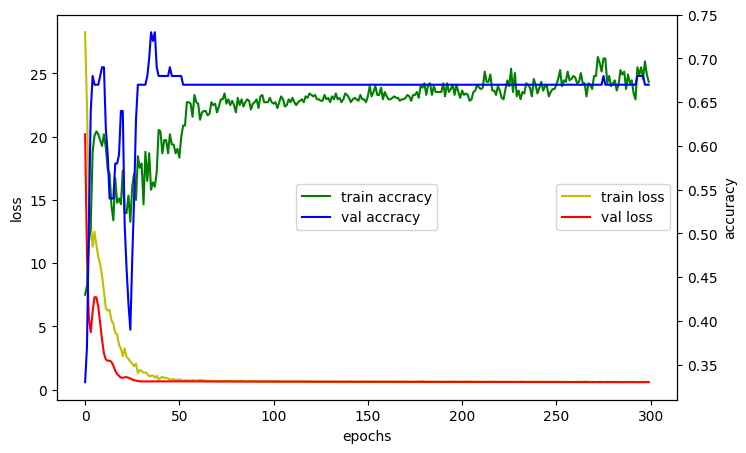

In [129]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


## 6. 모델평가 & 교차표

In [140]:
loss, accracy = model.evaluate(X_test, Y_test)
print('loss : {}, 정확도 : {}'.format(loss,accracy))

3/3 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6029
loss : 0.6529747247695923, 정확도 : 0.6029411554336548


In [168]:
# 교차표
Y_test.argmax(axis=1) # 실제값 == y_tesst
y_hat = model.predict(X_test)
y_hat

3/3 [==============================] - 0s 3ms/step


array([[0.6721242 , 0.32787582],
       [0.67554224, 0.32445776],
       [0.6403284 , 0.3596716 ],
       [0.6302412 , 0.36975878],
       [0.6986259 , 0.3013741 ],
       [0.71150035, 0.2884997 ],
       [0.6625833 , 0.3374167 ],
       [0.619717  , 0.3802831 ],
       [0.6511036 , 0.3488964 ],
       [0.69337744, 0.3066225 ],
       [0.6020079 , 0.39799213],
       [0.68013465, 0.31986535],
       [0.66157854, 0.33842143],
       [0.63725746, 0.36274254],
       [0.70444983, 0.2955502 ],
       [0.54585814, 0.45414189],
       [0.6243327 , 0.37566733],
       [0.70611715, 0.2938829 ],
       [0.6674373 , 0.33256269],
       [0.69972193, 0.3002781 ],
       [0.7184743 , 0.28152567],
       [0.67015094, 0.32984897],
       [0.6414526 , 0.35854736],
       [0.68485546, 0.31514454],
       [0.70246744, 0.29753253],
       [0.6842339 , 0.31576604],
       [0.68201435, 0.31798568],
       [0.66795236, 0.33204764],
       [0.6465444 , 0.3534557 ],
       [0.70508003, 0.29491997],
       [0.

In [151]:
pd.crosstab(y_test, y_hat)

col_0,0
row_0,
0.0,41
1.0,27


## 7. 모델 저장 및 사용

In [169]:
model.save('model/06_pima.h5')